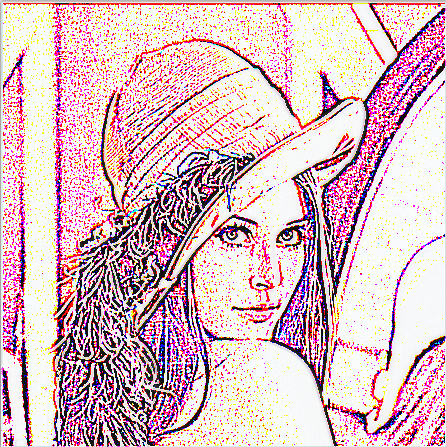

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


def convolution(image,kernel):
    img_row ,img_column , img_channel=image.shape
    #kernel_size=kernel.shape[0]
    #padding_width=(kernel_size-1)//2
    output=np.zeros(image.shape)
    padded_image=np.zeros((img_row+kernel.shape[0]-1,img_column+kernel.shape[1]-1,img_channel))
    padded_image[kernel.shape[0]-2:kernel.shape[0]-2+img_row,kernel.shape[1]-2:kernel.shape[1]-2+img_column]=image
    for j in range(img_column):
        for i in range(img_row):
            output[i,j,0]=np.sum(padded_image[i:i+kernel.shape[0],j:j+kernel.shape[1],0]*kernel)
            output[i,j,1]=np.sum(padded_image[i:i+kernel.shape[0],j:j+kernel.shape[1],1]*kernel)
            output[i,j,2]=np.sum(padded_image[i:i+kernel.shape[0],j:j+kernel.shape[1],2]*kernel)
            output[i,j,3]=np.sum(padded_image[i:i+kernel.shape[0],j:j+kernel.shape[1],3]*kernel)
    return output

sharpen=np.array([[-1,-1,-1,-1,-1],
                  [-1,-1,-1,-1,-1],
                  [-1,-1,25,-1,-1],
                  [-1,-1,-1,-1,-1],
                  [-1,-1,-1,-1,-1]])/-25

file="iptask2.png"
im=(np.array(Image.open(file)))
#intensity = [[sum(im[x, y]) / 3 for y in range(im.shape[1])] for x in range(im.shape[0])]
im=convolution(im,sharpen)
#im=convolution(im,x_direction_kernel)
new_img=Image.fromarray((im).astype(np.uint8))
#new_img.show()
new_img.save('sharpen.png')
Image.open('sharpen.png')